# Grade Analysis
<br> This notebook is to used explore and test hypotesis related to grades from my University.
<br> All grades belong to undergraduate students from Faculty of Engineering and Natural Sciences (FENS)
<br> It is partitioned in three parts:<br>
<ul>
    <li>Grades grouped by Program</li>
    <li>Grades grouped by Semester</li>
    <li>Grades grouped by Course Type (FENS-course and non-FENS course)</li>
</ul>

<br><br>Importing standard packages

In [1]:
import pandas as pd
import numpy as np

Reading data

In [2]:
grades = pd.read_csv('data_added_variables.csv')

In [18]:
grades['Registration Date'] = grades['Registration Date'].str.split('-',1,expand=True)[0] #Keeping only the year

In [19]:
grades

,Unnamed: 0,Student ID,Date of Birth,Registration Date,Faculty,Program,Education Level,Semester,Course code,Course name,Credits,Num Grade,Letter Grade,Grade Coefficient,Semester after registration,Program Course,FENS Course
0,0,140301026,1995-09-19,2014,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,BIO370,WORK PLACEMENT / INTERNSHIP,3|6,5.0,U,NaN,8,Program course,FENS course
1,1,140301026,1995-09-19,2014,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,BIO407,PROTEIN ENGINEERING,3|6,6.0,C,2.0,8,Program course,FENS course
2,2,140301026,1995-09-19,2014,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,BIO411,MAMMALIAN PHYSIOLOGY,3|6,5.0,F,0.0,8,Program course,FENS course
3,3,140301026,1995-09-19,2014,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,CS306,DATABASE MANAGEMENT,3|6,5.0,F,0.0,8,Non-program course,FENS course
4,4,140301026,1995-09-19,2014,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,ENS213,PROGRAMMING FOR ENGINEERS (+),3|6,5.0,F,0.0,8,Non-program course,FENS course
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,4490,190302141,1999-09-20,2019,Faculty of Engineering and Natural Sciences,Software Engineering (Bachelor),I Cycle (Bachelor),2019 Fall,ECON111,INTRO. TO MICROECONOMICS,3|6,5.0,F,0.0,1,Non-program course,Non-FENS course
4491,4491,190302141,1999-09-20,2019,Faculty of Engineering and Natural Sciences,Software Engineering (Bachelor),I Cycle (Bachelor),2019 Fall,ELIT100,ACADEMIC ENGLISH AND EFFECTIVE COMMUNICATION,3|6,5.0,F,0.0,1,Non-program course,Non-FENS course
4492,4492,190302141,1999-09-20,2019,Faculty of Engineering and Natural Sciences,Software Engineering (Bachelor),I Cycle (Bachelor),2019 Fall,MATH101,CALCULUS I,3|6,5.0,F,0.0,1,Non-program course,FENS course
4493,4493,190302141,1999-09-20,2019,Faculty of Engineering and Natural Sciences,Software Engineering (Bachelor),I Cycle (Bachelor),2019 Fall,NS112,UNDERSTANDING SCIENCE AND TECHNOLOGY,1.5|3,6.0,C,2.0,1,Non-program course,FENS course


In [30]:
grades['Student ID'].nunique()

127

In [31]:
dist = pd.pivot_table(grades,values='Student ID',index=['Program'], columns=['Registration Date'], aggfunc=lambda x: len(x.unique())).reset_index()

In [44]:
dist.to_csv('transcript_dist.csv')


In [28]:
dist['2014'].sum() + dist['2015'].sum() + dist['2016'].sum() + dist['2017'].sum()+ dist['2018'].sum() + dist['2019'].sum()

127.0

Removing Psychology program (non-FENS program) and Master (non Undergraduate)

In [138]:
grades.drop('Unnamed: 0', axis=1, inplace=True)

In [139]:
indexes = grades[grades['Program']=='Psychology (Bachelor)'].index

In [140]:
grades.drop(indexes, inplace=True)

In [141]:
indexes = grades[grades['Program']=='Electrical and Electronics Engineering (Master)'].index

In [142]:
grades.drop(indexes, inplace=True)

Removing grades that are not standard <br>
This includes grades used for internship or Erasmus courses

In [3]:
grades_for_coeff = grades.drop(grades[grades[' Grade Coefficient'] < -1].index)

In [ ]:
grades[-grades['Letter Grade'].isin(['C', 'F', 'B','E', 'C+', 'B-', 'A-','B+','A'])]

In [4]:
grades_for_coeff.dropna(subset=[' Grade Coefficient'], inplace=True)

In [5]:
grades_for_coeff[' Grade Coefficient'].unique()

array([2. , 0. , 3. , 1. , 2.3, 2.7, 3.7, 3.3, 4. ])

In [103]:
grades['Program'].unique()

array(['Genetics and Bioengineering (Bachelor)',
       'Architecture (Bachelor)',
       'Computer Sciences and Engineering (Bachelor)',
       'Electrical and Electronics Engineering (Bachelor)',
       'Industrial Engineering (Bachelor)',
       'Mechanical Engineering (Bachelor)',
       'Software Engineering (Bachelor)'], dtype=object)

## Exploratory data analysis

#### Program

In [6]:
programs =grades_for_coeff.groupby('Program')

In [112]:
programs.nunique()

,Student ID,Date of Birth,Registration Date,Faculty,Program,Education Level,Semester,Course code,Course name,Credits,Num Grade,Letter Grade,Grade Coefficient,Semester after registration
Program,,,,,,,,,,,,,,
Architecture (Bachelor),29,28,7,1,1,1,11,83,82,5,13,13,10,11
Computer Sciences and Engineering (Bachelor),37,36,7,1,1,1,13,118,116,4,12,14,10,13
Electrical and Electronics Engineering (Bachelor),10,10,5,1,1,1,13,71,72,4,11,13,10,13
Genetics and Bioengineering (Bachelor),14,14,6,1,1,1,13,76,79,4,6,14,10,11
Industrial Engineering (Bachelor),5,5,4,1,1,1,12,62,61,4,6,12,10,12
Mechanical Engineering (Bachelor),9,9,7,1,1,1,11,72,72,4,6,14,10,11
Software Engineering (Bachelor),23,23,6,1,1,1,11,85,85,5,6,13,10,11


Importing data visualization and statistic packages 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
import pylab
import scipy.stats as stats

Text(0.5, 0.98, 'Distribution of IUS grading coefficient with respect to Programs in FENS,and overall distribution of FENS')

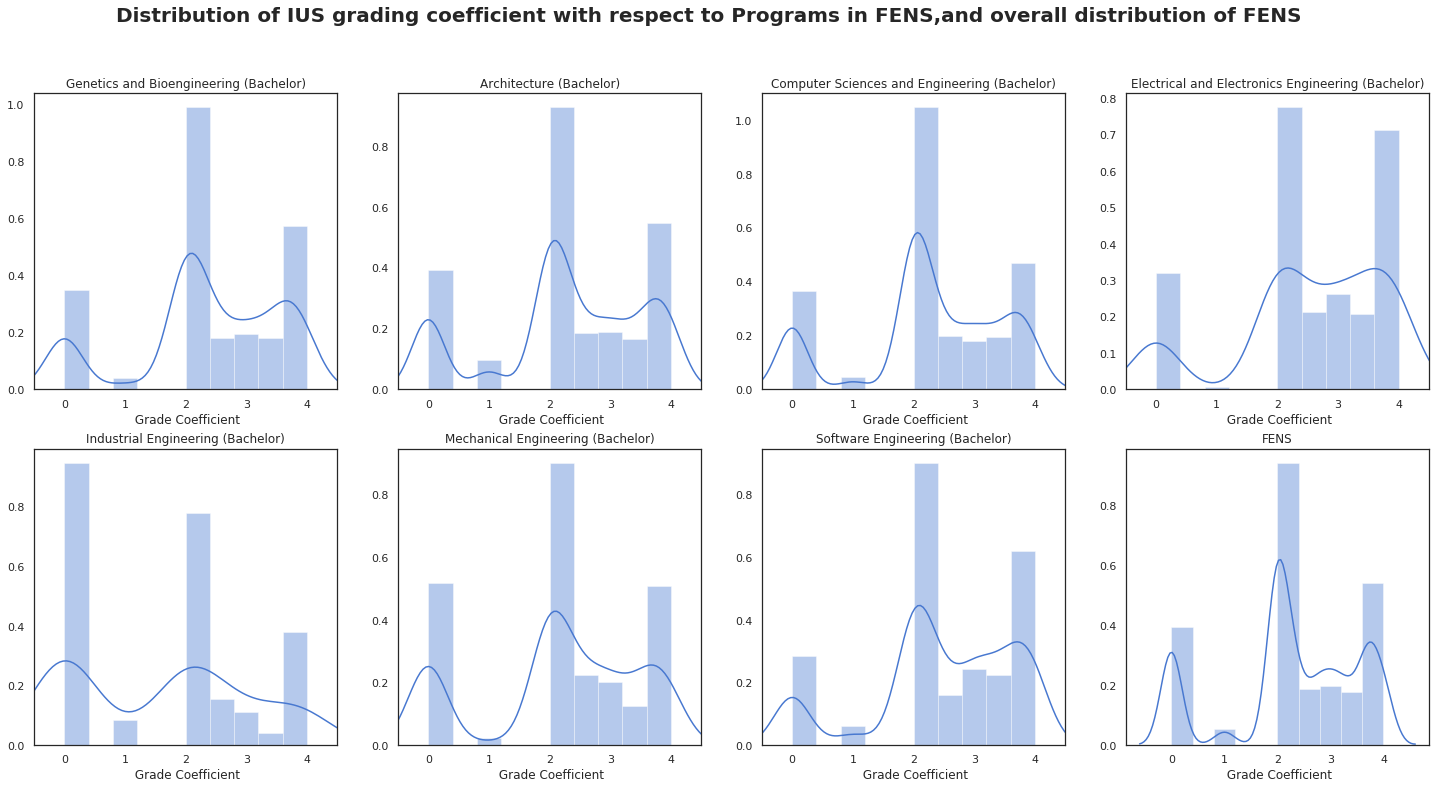

In [197]:
fig, axes = plt.subplots(2, 4, figsize=(25,12))
axes_position = [axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3], axes[1, 0], axes[1, 1], axes[1, 2]] 
for ind,program in enumerate(grades['Program'].unique()):
    axes_position[ind].set_title(program)
    axes_position[ind].set_xlim(-0.5,4.5)
    program_df = programs.get_group(program)
    sns.distplot(program_df[' Grade Coefficient'], ax=axes_position[ind]
                , bins=10)
sns.distplot(grades_for_coeff[' Grade Coefficient'], ax = axes[1,3], bins = 10)
axes[1, 3].set_title('FENS')

#     plt.setp(axes_position[ind].get_xticklabels(), visible = True)
fig.suptitle('Distribution of IUS grading coefficient with respect to Programs in FENS,'+
          'and overall distribution of FENS', fontsize = 20, fontweight = 'bold')


/home/fuad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


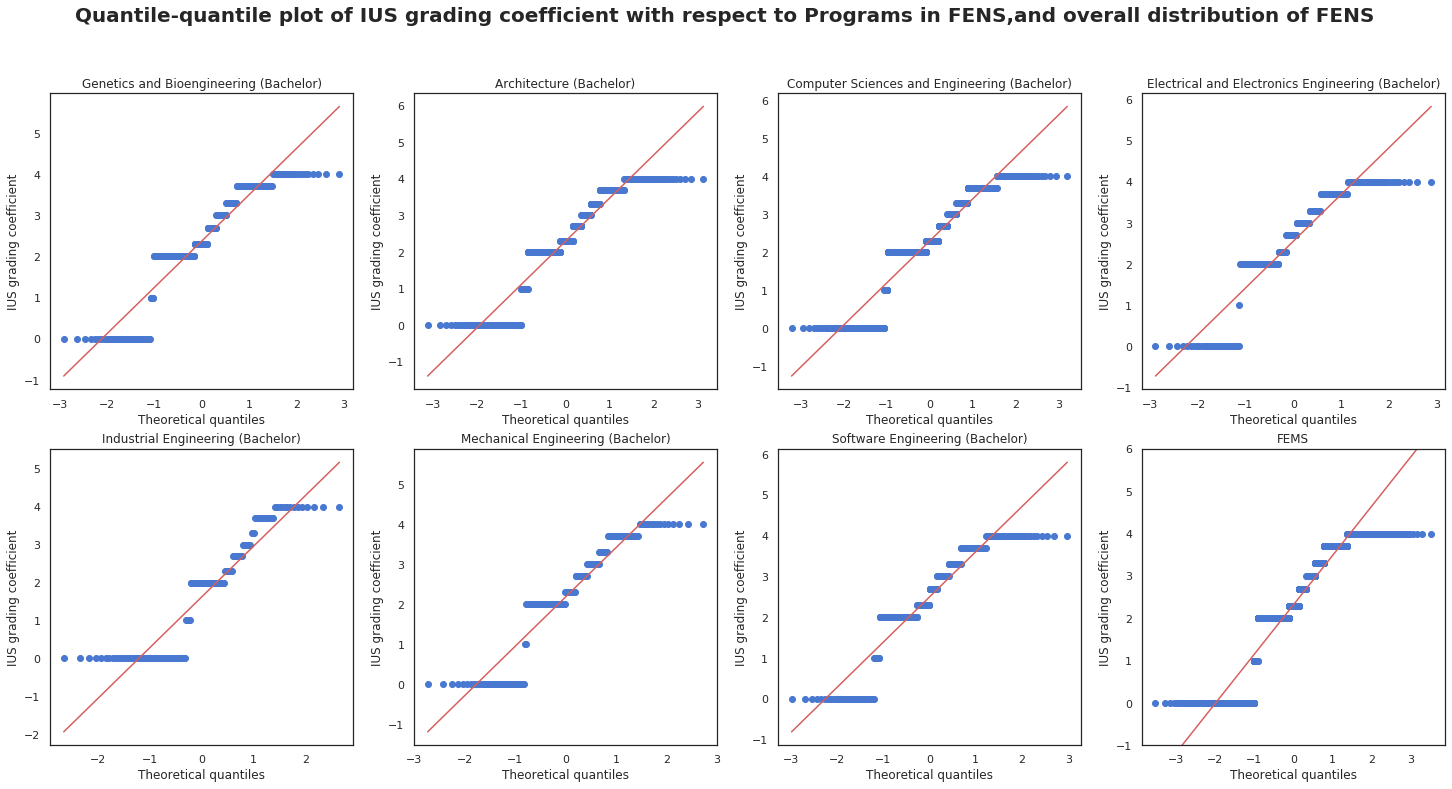

In [196]:
fig = plt.figure(figsize=(25,12))
axes_position = [241, 242, 243, 244, 245, 246, 247, 248] 
for ind,program in enumerate(grades['Program'].unique()):
    axis = fig.add_subplot(axes_position[ind])
    program_df = programs.get_group(program)
    stats.probplot(program_df[' Grade Coefficient'], 
                   dist='norm', plot=plt)
    axis.set_title(program)
    axis.set_ylabel('IUS grading coefficient')

    
axis = fig.add_subplot(axes_position[7])
stats.probplot(grades_for_coeff[' Grade Coefficient'], 
                   dist='norm', plot=plt)
axis.set_title('FENS')
axis.set_ylabel('IUS grading coefficient')
axis.set_ylim(-1,6)
fig.suptitle('Quantile-quantile plot of IUS grading coefficient with respect to Programs in FENS,'+
          'and overall distribution of FENS', fontsize = 20, fontweight = 'bold')
fig.show()

In [129]:
programs.mean()

,Student ID,Grade Coefficient,Semester after registration
Program,,,
Architecture (Bachelor),1.566927e+08,2.293920,3.717982
Computer Sciences and Engineering (Bachelor),1.565853e+08,2.288213,4.470532
Electrical and Electronics Engineering (Bachelor),1.535499e+08,2.554986,4.421652
Genetics and Bioengineering (Bachelor),1.592984e+08,2.370180,4.557841
Industrial Engineering (Bachelor),1.540874e+08,1.618079,4.209040
Mechanical Engineering (Bachelor),1.578246e+08,2.175676,3.635135
Software Engineering (Bachelor),1.686562e+08,2.491875,6.268750


In [130]:
programs.median()

,Student ID,Grade Coefficient,Semester after registration
Program,,,
Architecture (Bachelor),150302044,2.3,3
Computer Sciences and Engineering (Bachelor),150302082,2.3,3
Electrical and Electronics Engineering (Bachelor),150302102,2.7,4
Genetics and Bioengineering (Bachelor),160301001,2.3,3
Industrial Engineering (Bachelor),160302027,2.0,4
Mechanical Engineering (Bachelor),160302066,2.3,3
Software Engineering (Bachelor),170302084,2.5,3


In [132]:
programs.agg(lambda x:x.value_counts().index[0])

,Student ID,Date of Birth,Registration Date,Faculty,Education Level,Semester,Course code,Course name,Credits,Num Grade,Letter Grade,Grade Coefficient,Semester after registration
Program,,,,,,,,,,,,,
Architecture (Bachelor),140302092,1996-11-11,2014-09-22,Faculty of Engineering and Natural Sciences,I Cycle (Bachelor),2019 Fall,ARCH102,HISTORY OF ARCHITECTURE I,3|6,6,C,2.0,1
Computer Sciences and Engineering (Bachelor),140302102,1995-07-31,2014-09-22,Faculty of Engineering and Natural Sciences,I Cycle (Bachelor),2018 Fall,MATH204,DISCRETE MATHEMATICS,3|6,6,C,2.0,1
Electrical and Electronics Engineering (Bachelor),140302125,1995-08-18,2016-09-26,Faculty of Engineering and Natural Sciences,I Cycle (Bachelor),2019 Fall,MATH202,DIFFERENTIAL EQUATIONS,3|6,6.0,C,2.0,1
Genetics and Bioengineering (Bachelor),160301001,1997-03-18,2015-09-21,Faculty of Engineering and Natural Sciences,I Cycle (Bachelor),2019 Fall,NS102,PHYSICS,3|6,6.0,C,2.0,1
Industrial Engineering (Bachelor),140302082,1994-04-03,2016-09-26,Faculty of Engineering and Natural Sciences,I Cycle (Bachelor),2018 Fall,MATH101,CALCULUS I,3|6,5.0,F,0.0,1
Mechanical Engineering (Bachelor),150302094,1996-09-05,2016-09-26,Faculty of Engineering and Natural Sciences,I Cycle (Bachelor),2019 Fall,NS102,CALCULUS I,3|6,6.0,C,2.0,2
Software Engineering (Bachelor),150302070,1997-06-22,2016-09-26,Faculty of Engineering and Natural Sciences,I Cycle (Bachelor),2019 Fall,CS103,CALCULUS I,3|6,6.0,C,2.0,1


In [162]:
grades['Num Grade'][grades['Num Grade'] == '10.0'] = '10'

In [179]:
grades['Letter Grade'][grades['Letter Grade'] == 'N'] = float('NaN')

In [181]:
grades.to_csv('data_added_variables.csv')

In [9]:
program_bar = grades.groupby('Program')

Text(0.5, 0.98, 'Bar plots of Canton Sarajevo law grading system with respect to Programs in FENS and for FENS overall')

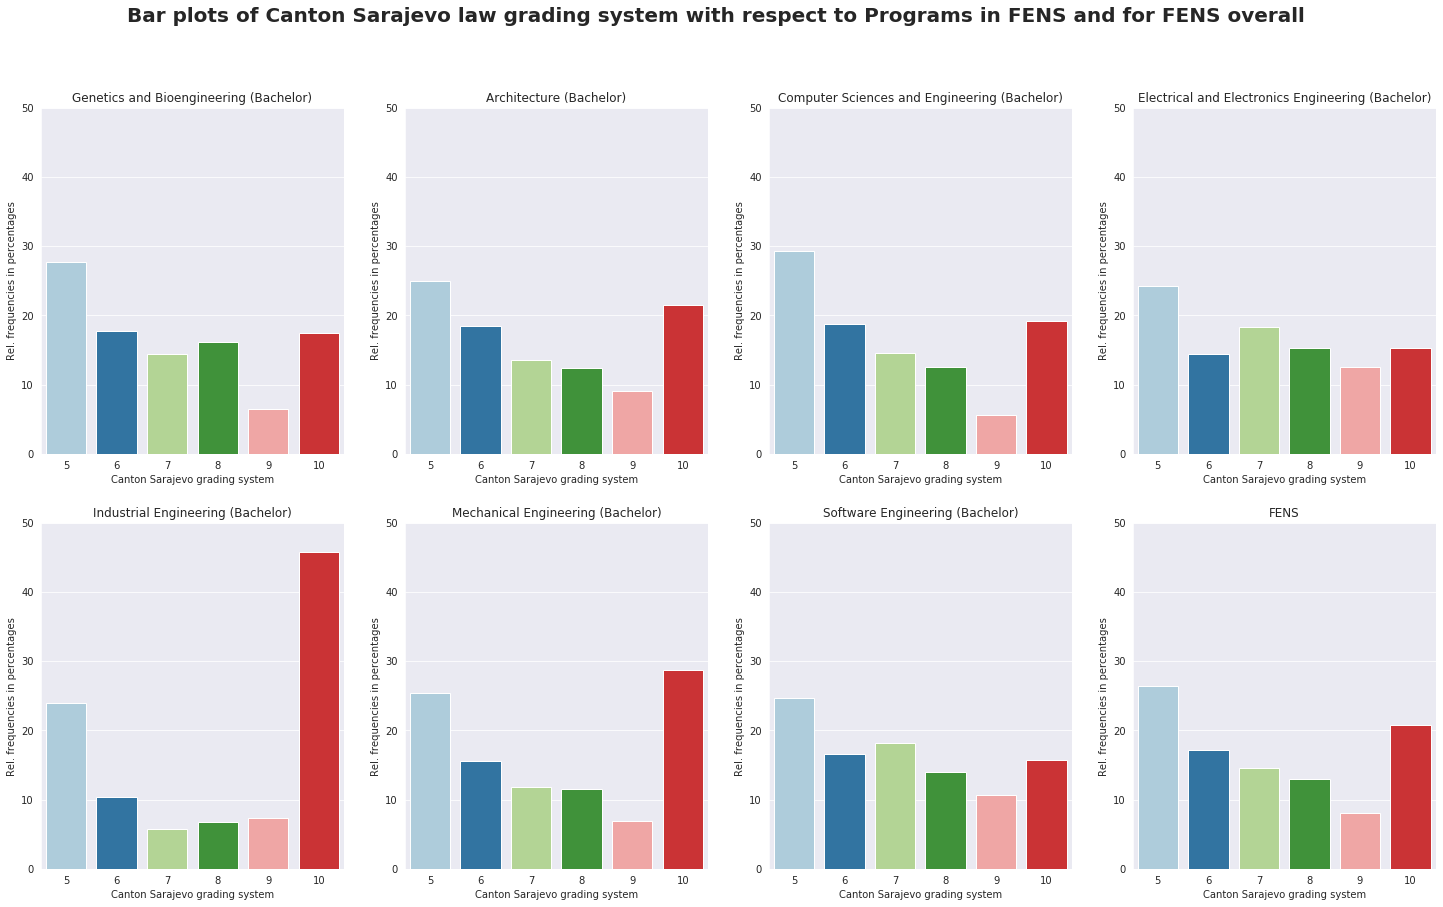

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(25,14))
axes_position = [axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3], axes[1, 0], axes[1, 1], axes[1, 2]] 
custom_palette = sns.color_palette("Paired", 9)
for ind,program in enumerate(grades['Program'].unique()):
    axes_position[ind].set_title(program)
    program_df = program_bar.get_group(program)
    percentages = list(program_df.groupby('Num Grade').count()['Student ID'])
    percentages.append(percentages[0])
    percentages = percentages[1:]
    sns.barplot(x = [5,6,7,8,9,10],
                y = percentages
                /program_df['Student ID'][program_df['Num Grade'].notna()].count()*100,
               ax=axes_position[ind], palette=custom_palette)
    axes_position[ind].set_ylim(0,50)
    axes_position[ind].set_ylabel('Rel. frequencies in percentages')
    axes_position[ind].set_xlabel('Canton Sarajevo grading system')

percentages = list(grades.groupby('Num Grade').count()['Student ID'])
percentages.append(percentages[0])
percentages = percentages[1:]
sns.barplot(x = [5,6,7,8,9,10],
                y = percentages
                /grades['Student ID'][grades['Num Grade'].notna()].count()*100,
               ax=axes[1,3],  palette=custom_palette)
axes[1, 3].set_title('FENS')
axes[1, 3].set_ylim(0,50)
axes[1, 3].set_ylabel('Rel. frequencies in percentages')
axes[1, 3].set_xlabel('Canton Sarajevo grading system')
fig.suptitle('Bar plots of Canton Sarajevo law grading system with respect to Programs in FENS'+
          ' and for FENS overall', fontsize = 20, fontweight = 'bold')


Text(0.5, 0.98, 'Bar plots of Harmonized International letter grade with respect to Programs in FENS and for FENS overall')

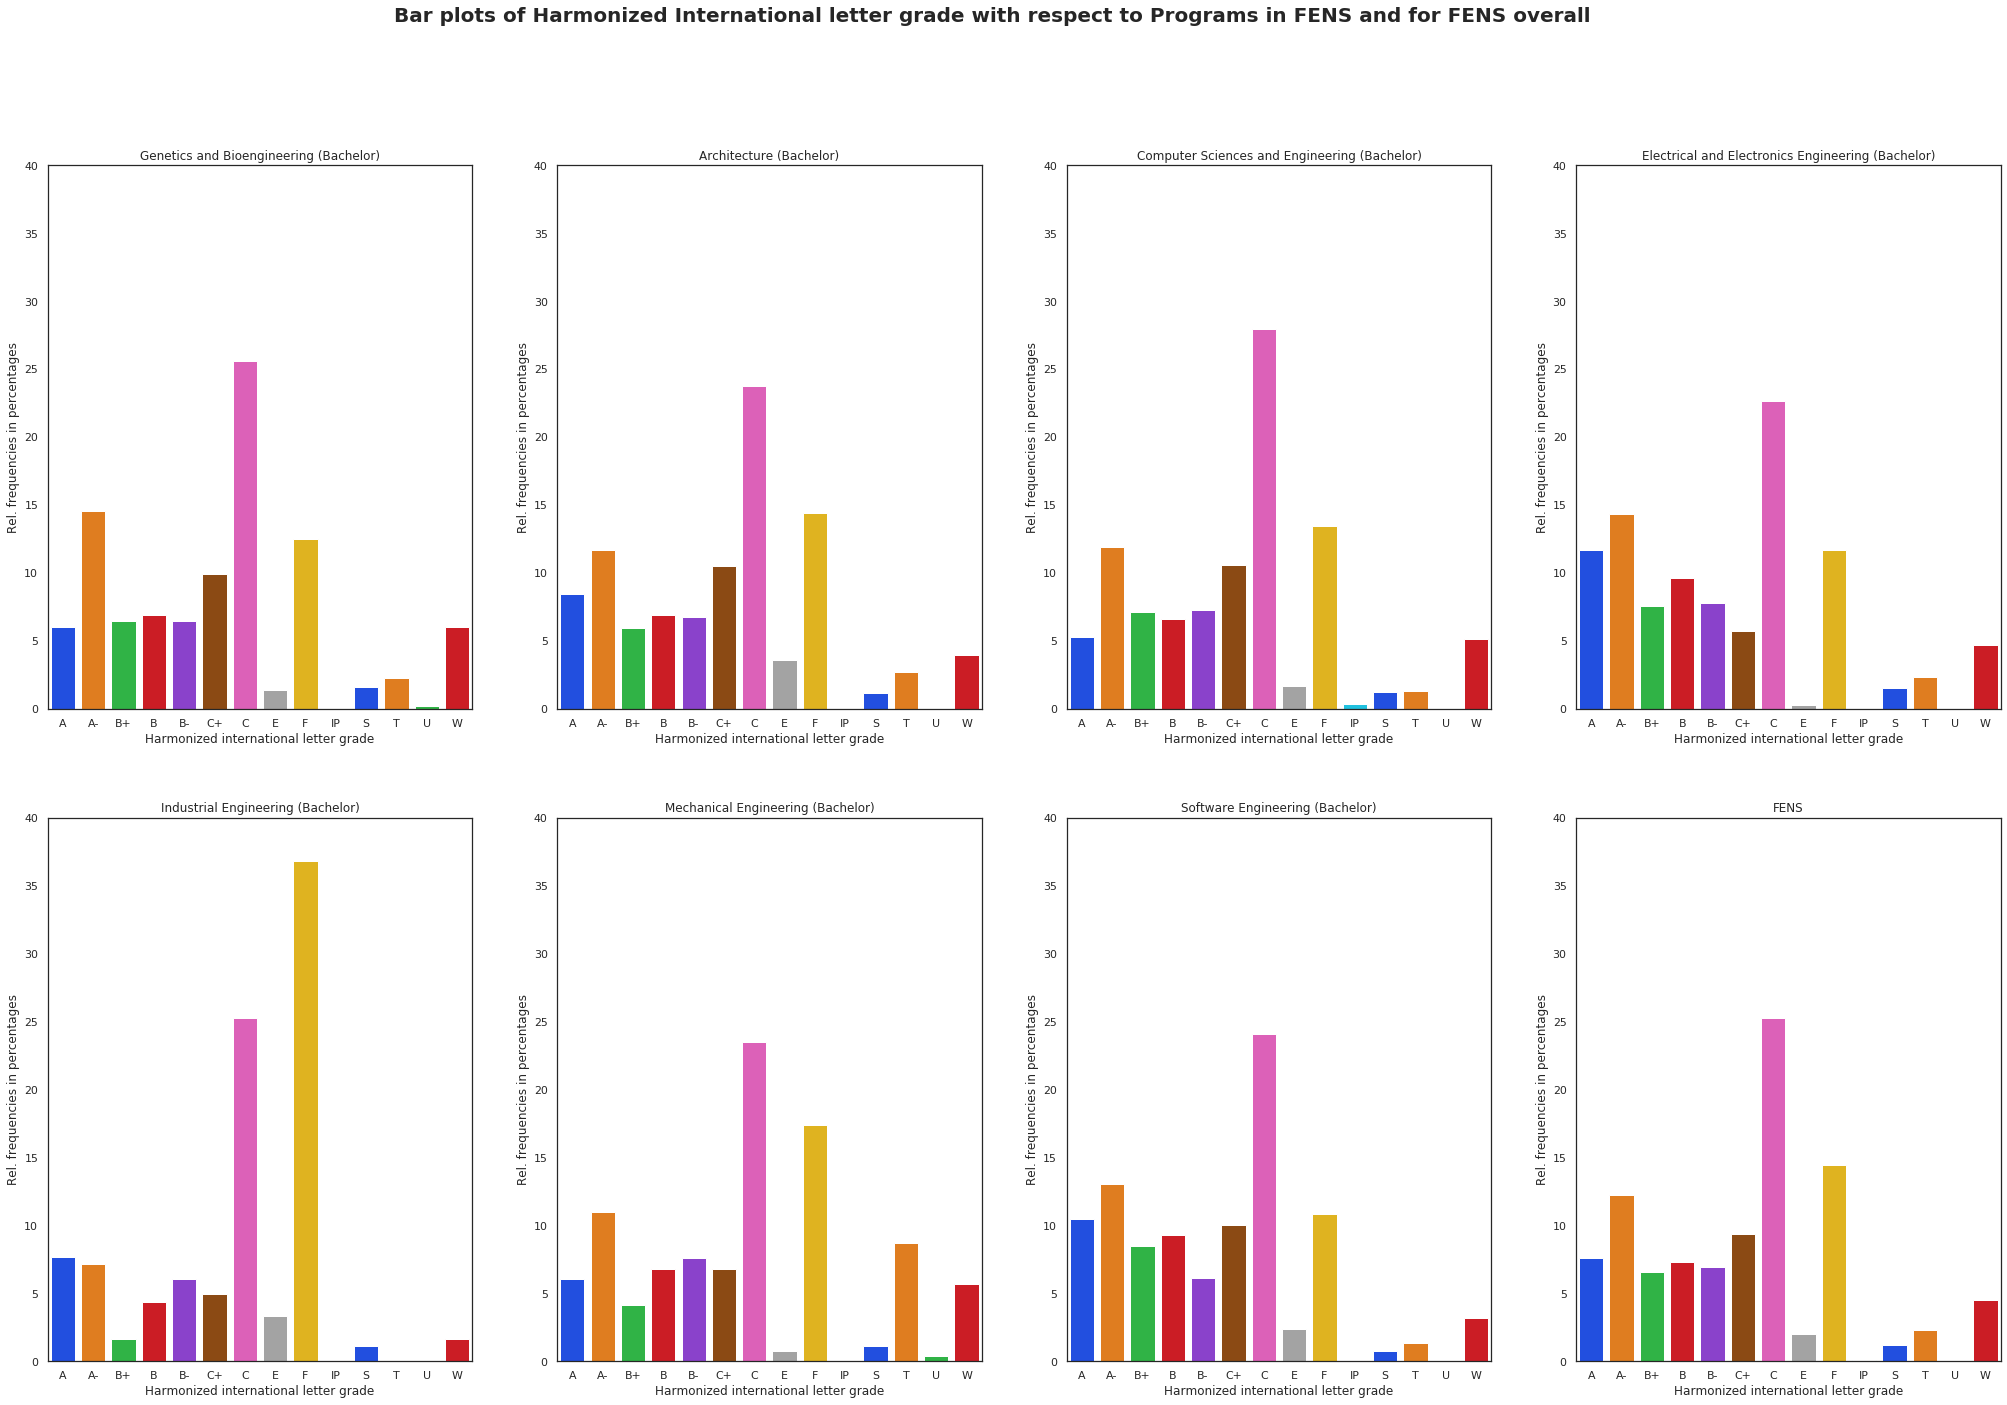

In [377]:
fig, axes = plt.subplots(2, 4, figsize=(35,22))
axes_position = [axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3], axes[1, 0], axes[1, 1], axes[1, 2]] 
all_letters = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'E', 'F', 'IP', 'S', 'T', 'U', 'W']
custom_palette = sns.color_palette("Paired", 9)
for ind,program in enumerate(grades['Program'].unique()):
    axes_position[ind].set_title(program)
    program_df = program_bar.get_group(program)
    x = list(program_df.groupby('Letter Grade').count()['Student ID'].index)
    y = list(program_df.groupby('Letter Grade').count()['Student ID']
         /program_df['Student ID'][program_df['Letter Grade'].notna()].count()*100)
    grade_dict = {}
    for inx,letter in enumerate(x):
        grade_dict[letter] = y[inx]
    count_grade = []
    for letter in all_letters:
        if letter in grade_dict:
            count_grade.append(grade_dict[letter])
        else:
            count_grade.append(0)
    sns.barplot(x = all_letters,
                y = count_grade,
               ax=axes_position[ind], palette='bright')
    axes_position[ind].set_ylim(0,40)
    axes_position[ind].set_ylabel('Rel. frequencies in percentages')
    axes_position[ind].set_xlabel('Harmonized international letter grade')

x = list(grades.groupby('Letter Grade').count()['Student ID'].index)
y = list(grades.groupby('Letter Grade').count()['Student ID']
         /grades['Student ID'][grades['Letter Grade'].notna()].count()*100)

grade_dict = {}
for inx,letter in enumerate(x):
    grade_dict[letter] = y[inx]
count_grade = []
for letter in all_letters:
    if letter in grade_dict:
        count_grade.append(grade_dict[letter])
    else:
        count_grade.append(0)
sns.barplot(x = all_letters,
            y = count_grade,
               ax=axes[1,3],  palette='bright')
axes[1, 3].set_title('FENS')
axes[1, 3].set_ylim(0,40)
axes[1, 3].set_ylabel('Rel. frequencies in percentages')
axes[1, 3].set_xlabel('Harmonized international letter grade')
fig.suptitle('Bar plots of Harmonized International letter grade with respect to Programs in FENS'+
          ' and for FENS overall', fontsize = 20, fontweight = 'bold')

In [240]:
grades['Num Grade'][grades[' Grade Coefficient']==1]

8       5
27      5
67      5
77      5
78      5
       ..
4088    5
4123    5
4240    5
4413    5
4466    5
Name: Num Grade, Length: 76, dtype: object

In [313]:
grades['Letter Grade'].unique()

array(['U', 'C', 'F', nan, 'B', 'E', 'C+', 'B-', 'A-', 'S', 'B+', 'W',
       'A', 'IP', 'T'], dtype=object)

In [323]:
grades = pd.read_csv('data_added_variables.csv')


In [11]:
programs_time = grades.groupby('Program')

#### Semesters passed after registration

In [13]:
semesters = grades['Semester'].unique()
semesters = sorted(semesters, key=lambda semester: f"{semester[:5]}a"
                      if 'Spring' in semester else f"{semester[:5]}b")

In [ ]:
semesters = semesters[:-1]

In [19]:
semesters.index(' 2014 Fall')

0

In [24]:
programs_line = pd.DataFrame(columns=['Semester', 'Program', 'Mean'])
for ind,program in enumerate(grades['Program'].unique()):
    program_df = programs_time.get_group(program)
    current_program = pd.DataFrame({'Mean':pd.Series(program_df.groupby('Semester').mean()[' Grade Coefficient'])}).reset_index()
    program_per_semesters = pd.DataFrame({'Semester':pd.Series(semesters)})
    program_per_semesters['Program'] = program
    program_per_semesters = program_per_semesters.merge(current_program, how='left', on='Semester')
    programs_line = programs_line.append(program_per_semesters)
    
    

In [30]:
current_program = pd.DataFrame({'Mean':pd.Series(grades.groupby('Semester').mean()[' Grade Coefficient'])}).reset_index()
program_per_semesters = pd.DataFrame({'Semester':pd.Series(semesters)})
program_per_semesters['Program'] = 'FENS'
program_per_semesters = program_per_semesters.merge(current_program, how='left', on='Semester')
programs_line = programs_line.append(program_per_semesters)
    

In [31]:
semesters

[' 2014 Fall',
 ' 2015 Spring',
 ' 2015 Fall',
 ' 2016 Spring',
 ' 2016 Fall',
 ' 2017 Spring',
 ' 2017 Fall',
 ' 2018 Spring',
 ' 2018 Fall',
 ' 2019 Spring',
 ' 2019 Fall',
 ' 2020 Spring']

In [47]:
overall_programs 

,Semester_num,Mean
0,1,2.591131
1,2,2.729323
2,3,2.304842
3,4,2.479977
4,5,2.538272
5,6,2.386631
6,7,2.153891
7,8,2.124621
8,9,2.309721
9,10,2.167344


In [39]:
programs_line_ordered = pd.DataFrame()
programs_line_ordered['Semester'] = semesters

In [34]:
programs_line['Semester_num'] = programs_line['Semester'].apply(lambda x: semesters.index(x)+1)

In [35]:
programs_line

,Semester,Program,Mean,Semester_num
0,2014 Fall,Genetics and Bioengineering (Bachelor),3.400000,1
1,2015 Spring,Genetics and Bioengineering (Bachelor),3.250000,2
2,2015 Fall,Genetics and Bioengineering (Bachelor),2.933333,3
3,2016 Spring,Genetics and Bioengineering (Bachelor),2.980000,4
4,2016 Fall,Genetics and Bioengineering (Bachelor),3.176923,5
...,...,...,...,...
7,2018 Spring,FENS,2.155013,8
8,2018 Fall,FENS,2.365613,9
9,2019 Spring,FENS,2.257374,10
10,2019 Fall,FENS,2.240394,11


Text(0.5, 1.0, 'Average grading coefficient in each semester grouped by FENS programs')

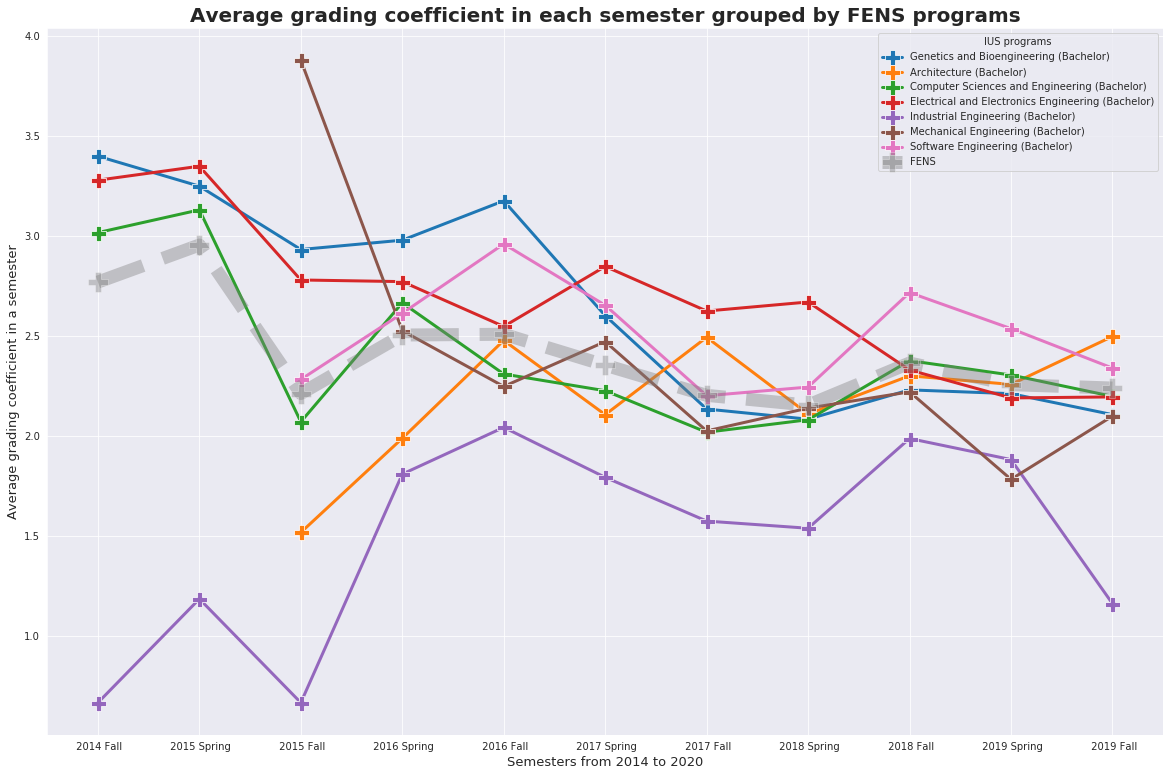

In [36]:
fig = plt.figure(figsize=(20,13),linewidth=10)
sns.set_style('darkgrid')
ax = sns.lineplot(x='Semester_num', y = 'Mean', data=programs_line, hue='Program')

for ind,line in enumerate(ax.lines):
    if ind == 7:
        line.set_linewidth(13)
        line.set_marker("P")
        line.set_markersize(20)
        line.set_linestyle('--')
        line.set_alpha(0.4)
    else:
        line.set_linewidth(3)
        line.set_marker("P")
        line.set_markersize(15)
    
ax.legend(labels = programs_line['Program'].unique(),loc='upper right', title = 'IUS programs')
ax.set_ylabel('Average grading coefficient in a semester', fontsize=13)
ax.set_xlabel('Semesters from 2014 to 2020', fontsize=13)
locs, labels = plt.xticks()
plt.xticks(range(1,12),semesters[:-1])
ax.set_title('Average grading coefficient in each semester grouped by FENS programs', fontsize = 20, fontweight = 'bold')

In [39]:
programs_line.groupby('Program').mean()

,Mean,Semester_num
Program,,
Architecture (Bachelor),2.195195,6.5
Computer Sciences and Engineering (Bachelor),2.400702,6.5
Electrical and Electronics Engineering (Bachelor),2.690429,6.5
FENS,2.411914,6.5
Genetics and Bioengineering (Bachelor),2.646697,6.5
Industrial Engineering (Bachelor),1.483017,6.5
Mechanical Engineering (Bachelor),2.377713,6.5
Software Engineering (Bachelor),2.506256,6.5


In [41]:
programs_line.groupby('Program').std()

,Mean,Semester_num
Program,,
Architecture (Bachelor),0.314851,3.605551
Computer Sciences and Engineering (Bachelor),0.378159,3.605551
Electrical and Electronics Engineering (Bachelor),0.383518,3.605551
FENS,0.254975,3.605551
Genetics and Bioengineering (Bachelor),0.513556,3.605551
Industrial Engineering (Bachelor),0.496844,3.605551
Mechanical Engineering (Bachelor),0.606174,3.605551
Software Engineering (Bachelor),0.256052,3.605551


<br>Finding a correlation between grades and number of semesters passed since registration <br> 

In [18]:
from scipy.stats import pearsonr, spearmanr
programs_line_cor = programs_line.dropna(subset=['Mean'])
pearsonr(programs_line_cor['Semester_num'],programs_line_cor['Mean'])

(-0.2645367911642102, 0.025791394267532606)

In [18]:
len(programs_line_cor)

71

In [27]:
spearmanr(programs_line_cor['Semester numeric'],programs_line_cor['Mean'])

SpearmanrResult(correlation=-0.3227095419230586, pvalue=0.006055079567625963)

 #### Semesters as unit of time

In [23]:
semester_groups = grades_for_coeff.groupby('Semester')

In [28]:
grades_for_coeff['Semester'].unique()

array([' 2019 Spring', ' 2017 Spring', ' 2017 Fall', ' 2015 Spring',
       ' 2019 Fall', ' 2018 Spring', ' 2014 Fall', ' 2016 Spring',
       ' 2015 Fall', 'Unknown', ' 2018 Fall', ' 2016 Fall'], dtype=object)

In [31]:
semesters

[' 2014 Fall',
 ' 2015 Spring',
 ' 2015 Fall',
 ' 2016 Spring',
 ' 2016 Fall',
 ' 2017 Spring',
 ' 2017 Fall',
 ' 2018 Spring',
 ' 2018 Fall',
 ' 2019 Spring',
 ' 2019 Fall',
 ' 2020 Spring']

Text(0.5, 0.98, 'Distribution of IUS grading coefficient with respect to Semester')

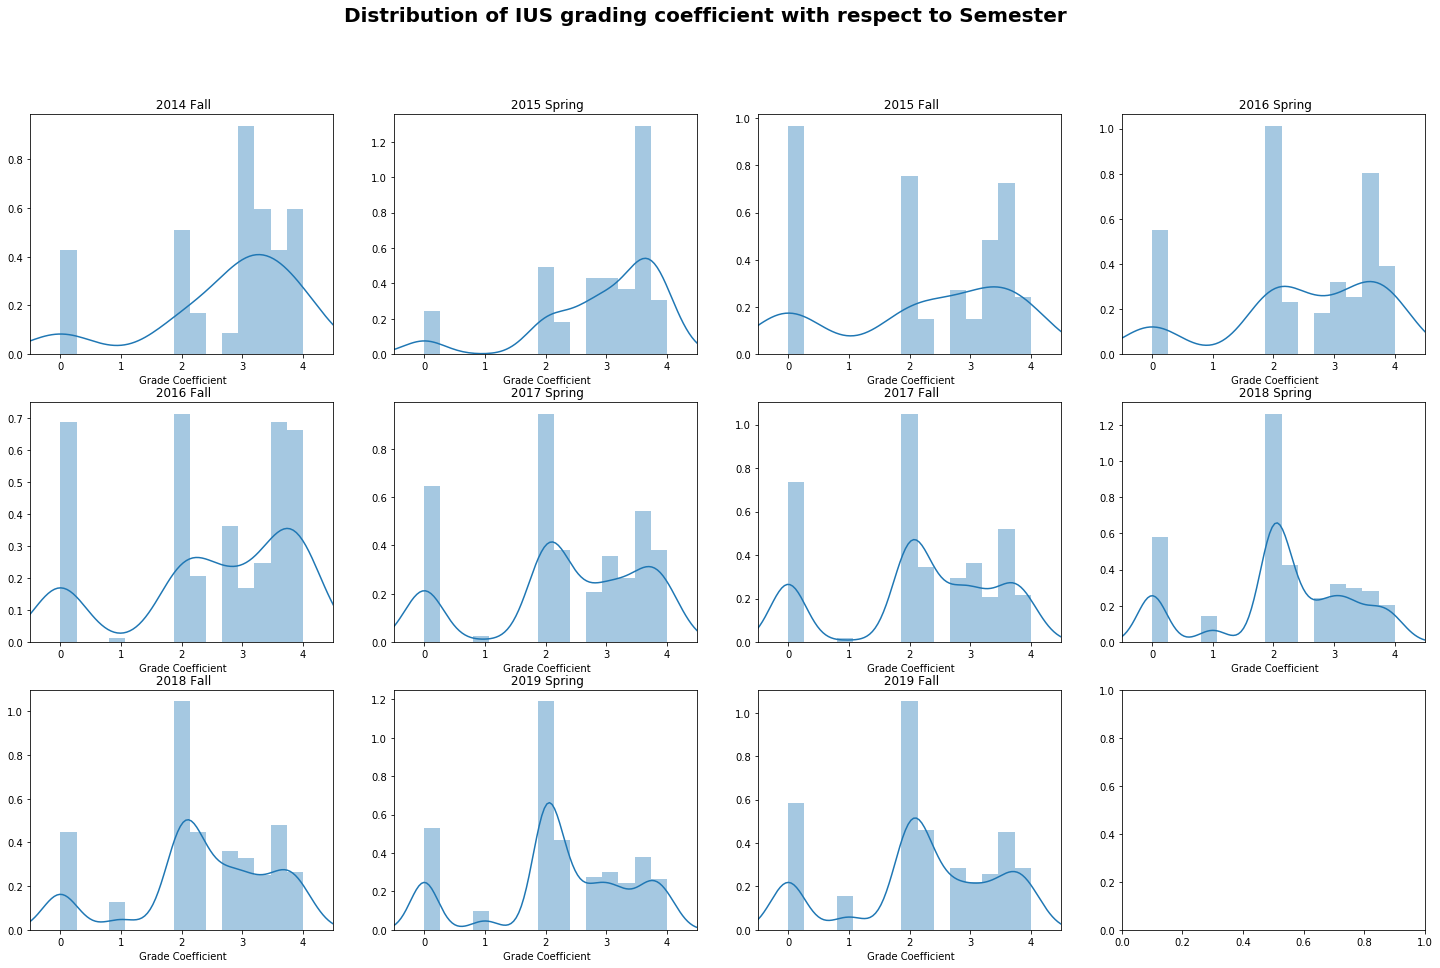

In [32]:
fig, axes = plt.subplots(3, 4, figsize=(25,15))
axes_position = [axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3], axes[1, 0], axes[1, 1], axes[1, 2],
                axes[1,3], axes[2,0],axes[2,1],axes[2,2],axes[2,3]] 
for ind,program in enumerate(semesters[:-1]):
    axes_position[ind].set_title(program)
    axes_position[ind].set_xlim(-0.5,4.5)
    program_df = semester_groups.get_group(program)
    sns.distplot(program_df[' Grade Coefficient'], ax=axes_position[ind]
                , bins=15)
# sns.distplot(programs_line['Mean'], ax = axes[1,3], bins = 10)
# axes[1, 3].set_title('FENS')

#     plt.setp(axes_position[ind].get_xticklabels(), visible = True)
fig.suptitle('Distribution of IUS grading coefficient with respect to Semester', fontsize = 20, fontweight = 'bold')


#### Type of courses (FENS or non-FENS)

Creating a time series graph for only one program

In [ ]:
arch = program_bar.get_group('Architecture (Bachelor)') 

In [390]:
y = arch.groupby('Semester').mean()[' Grade Coefficient']

In [396]:
y = pd.DataFrame({'Mean':pd.Series(arch.groupby('Semester').mean()[' Grade Coefficient'])}).reset_index()

In [397]:
y

,Semester,Mean
0,2015 Fall,1.518182
1,2016 Fall,2.478750
2,2016 Spring,1.988889
3,2017 Fall,2.494253
4,2017 Spring,2.107229
5,2018 Fall,2.301653
6,2018 Spring,2.110588
7,2019 Fall,2.498592
8,2019 Spring,2.258621
9,2020 Spring,NaN


In [388]:
program_per_semesters = pd.DataFrame({'Semester':pd.Series(semesters)})

In [399]:
program_per_semesters = program_per_semesters.merge(y, how='left', on='Semester')

In [401]:
program_per_semesters['Program'] = 'Architecture (Bachelor)'

In [402]:
program_per_semesters

,Semester,Mean,Program
0,2014 Fall,NaN,Architecture (Bachelor)
1,2015 Spring,NaN,Architecture (Bachelor)
2,2015 Fall,1.518182,Architecture (Bachelor)
3,2016 Spring,1.988889,Architecture (Bachelor)
4,2016 Fall,2.478750,Architecture (Bachelor)
5,2017 Spring,2.107229,Architecture (Bachelor)
6,2017 Fall,2.494253,Architecture (Bachelor)
7,2018 Spring,2.110588,Architecture (Bachelor)
8,2018 Fall,2.301653,Architecture (Bachelor)
9,2019 Spring,2.258621,Architecture (Bachelor)


In [65]:
test_df = pd.pivot_table(arch, values=' Grade Coefficient', index=['Semester'],
                         columns=['FENS Course'], aggfunc=np.mean).reset_index()

In [77]:
test_df['Semester_num'] = test_df['Semester'].apply(lambda x: semesters.index(x)+1 if x != 'Unknown' else float('NaN'))

In [78]:
test_df

FENS Course,Semester,FENS course,Non-FENS course,Semester_num
0,2014 Fall,2.666667,2.797143,1.0
1,2015 Fall,1.652381,2.791803,3.0
2,2015 Spring,2.830769,2.989583,2.0
3,2016 Fall,1.966176,2.992157,5.0
4,2016 Spring,2.300000,2.724051,4.0
5,2017 Fall,2.091925,2.805000,7.0
6,2017 Spring,2.086700,2.800820,6.0
7,2018 Fall,2.290065,2.832000,9.0
8,2018 Spring,2.129118,2.334694,8.0
9,2019 Fall,2.207750,2.456250,11.0


In [40]:
program_per_semesters = pd.DataFrame({'Semester':pd.Series(semesters)})
program_per_semesters['Program'] = 'Architecture (Bachelor)'
program_per_semesters = program_per_semesters.merge(test_df, how='left', on='Semester')
program_per_semesters

,Semester,Program,FENS course,Non-FENS course,Semester_num
0,2014 Fall,Architecture (Bachelor),2.666667,2.797143,1.0
1,2015 Spring,Architecture (Bachelor),2.830769,2.989583,2.0
2,2015 Fall,Architecture (Bachelor),1.652381,2.791803,3.0
3,2016 Spring,Architecture (Bachelor),2.300000,2.724051,4.0
4,2016 Fall,Architecture (Bachelor),1.966176,2.992157,5.0
5,2017 Spring,Architecture (Bachelor),2.086700,2.800820,6.0
6,2017 Fall,Architecture (Bachelor),2.091925,2.805000,7.0
7,2018 Spring,Architecture (Bachelor),2.129118,2.334694,8.0
8,2018 Fall,Architecture (Bachelor),2.290065,2.832000,9.0
9,2019 Spring,Architecture (Bachelor),2.198349,2.609859,10.0


In [44]:
program_per_semesters

,Semester,Program,FENS course,Non-FENS course,Semester_num
0,2014 Fall,Software Engineering (Bachelor),2.666667,2.797143,1.0
1,2015 Spring,Software Engineering (Bachelor),2.830769,2.989583,2.0
2,2015 Fall,Software Engineering (Bachelor),1.652381,2.791803,3.0
3,2016 Spring,Software Engineering (Bachelor),2.300000,2.724051,4.0
4,2016 Fall,Software Engineering (Bachelor),1.966176,2.992157,5.0
5,2017 Spring,Software Engineering (Bachelor),2.086700,2.800820,6.0
6,2017 Fall,Software Engineering (Bachelor),2.091925,2.805000,7.0
7,2018 Spring,Software Engineering (Bachelor),2.129118,2.334694,8.0
8,2018 Fall,Software Engineering (Bachelor),2.290065,2.832000,9.0
9,2019 Spring,Software Engineering (Bachelor),2.198349,2.609859,10.0


Text(0.5, 1.0, 'Average grading coefficinet in each semester grouped by FENS programs')

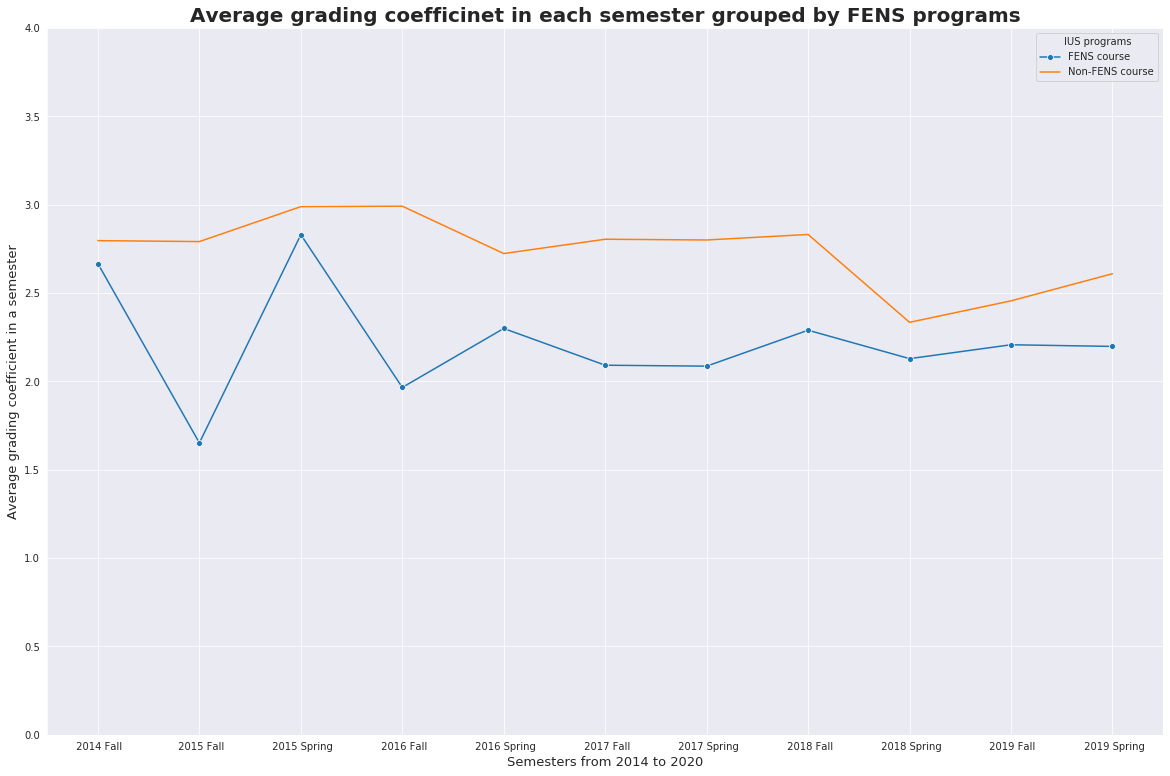

In [45]:
fig = plt.figure(figsize=(20,13),linewidth=10)
sns.set_style('darkgrid')
ax = sns.lineplot(x='Semester', y = 'FENS course', data=program_per_semesters, marker='o')
sns.lineplot(x='Semester', y = 'Non-FENS course', data=program_per_semesters)
ax.legend(labels = grades['FENS Course'].unique(),loc='upper right', title = 'IUS programs')
ax.set_ylabel('Average grading coefficient in a semester', fontsize=13)
ax.set_xlabel('Semesters from 2014 to 2020', fontsize=13)
ax.set_ylim(0,4)
ax.set_title('Average grading coefficinet in each semester grouped by FENS programs', fontsize = 20, fontweight = 'bold')

Now implenting it for all programs and FENS overall

Text(0.5, 0.98, 'Line graph for sample mean of grade coefficient with respect to FENS and non-FENS courses for each program and FENS overall\nfor semesters from 2014 to 2020')

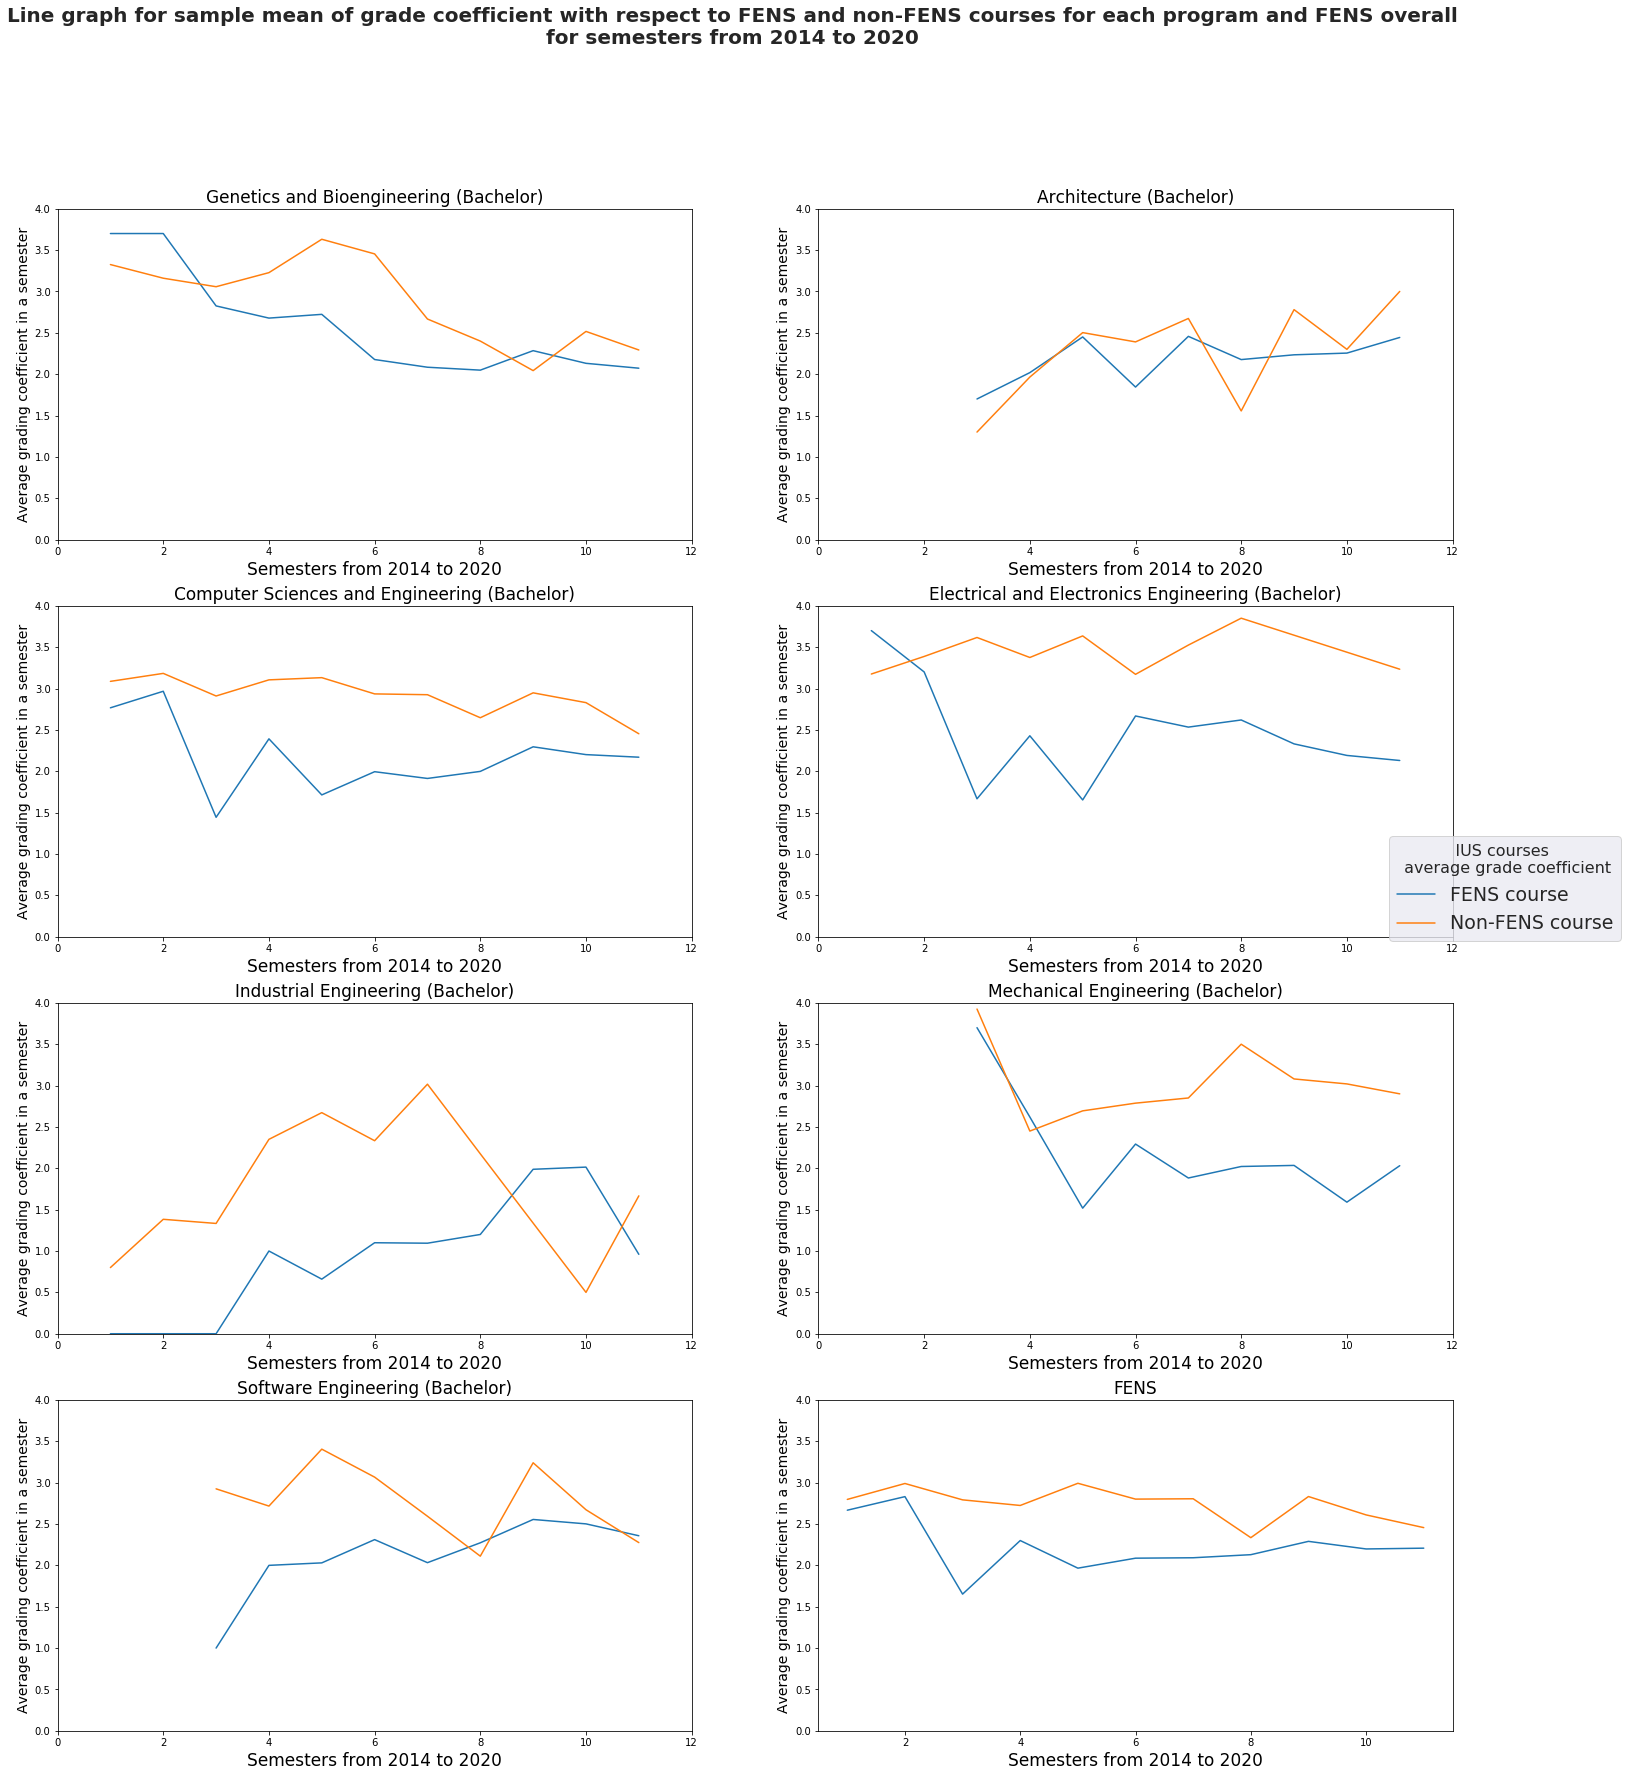

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(25,28))
axes_position = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0], axes[2, 1], axes[3, 0]] 
sns.set_style('darkgrid')
for ind,program in enumerate(grades['Program'].unique()):
    axes_position[ind].set_title(program, fontsize=17)
    program_df = program_bar.get_group(program)
    program_per_semesters = pd.DataFrame({'Semester':pd.Series(semesters)})
    program_per_semesters['Program'] = program
    test_df = pd.pivot_table(program_df, values=' Grade Coefficient', index=['Semester'],
                         columns=['FENS Course'], aggfunc=np.mean).reset_index()
    test_df['Semester_num'] = test_df['Semester'].apply(lambda x: semesters.index(x)+1 if x != 'Unknown' else float('NaN'))
    program_per_semesters = program_per_semesters.merge(test_df, how='left', on='Semester')
    sns.lineplot(x='Semester_num', y = 'FENS course', data=program_per_semesters, ax=axes_position[ind])
    sns.lineplot(x='Semester_num', y = 'Non-FENS course', data=program_per_semesters, ax=axes_position[ind])
    axes_position[ind].set_ylabel('Average grading coefficient in a semester', fontsize=14)
    axes_position[ind].set_xlabel('Semesters from 2014 to 2020', fontsize=17)
    axes_position[ind].set_ylim(0,4)
    axes_position[ind].set_xlim(0,12)

    

program_per_semesters = pd.DataFrame({'Semester':pd.Series(semesters)})
program_per_semesters['Program'] = program
test_df = pd.pivot_table(grades, values=' Grade Coefficient', index=['Semester'],
                         columns=['FENS Course'], aggfunc=np.mean).reset_index()
test_df['Semester_num'] = test_df['Semester'].apply(lambda x: semesters.index(x)+1 if x != 'Unknown' else float('NaN'))
program_per_semesters = program_per_semesters.merge(test_df, how='left', on='Semester')   
sns.lineplot(x='Semester_num', y = 'FENS course', data=program_per_semesters, ax=axes[3,1])
sns.lineplot(x='Semester_num', y = 'Non-FENS course', data=program_per_semesters, ax=axes[3,1])   
    
axes[3, 1].set_title('FENS', fontsize=17)
axes[3, 1].set_ylabel('Average grading coefficient in a semester', fontsize=14)
axes[3, 1].set_xlabel('Semesters from 2014 to 2020', fontsize=17)
axes[3,1].set_ylim(0,4)
legend = fig.legend(labels = grades['FENS Course'].unique()[:-1],loc='center right', 
           title = '           IUS courses \n average grade coefficient', fontsize=19)
legend.get_title().set_fontsize('16')
fig.suptitle('Line graph for sample mean of grade coefficient with respect to FENS'+
          ' and non-FENS courses for each program and FENS overall\nfor semesters from 2014 to 2020', fontsize = 20, fontweight = 'bold')

In [29]:
grades.columns

Index(['Unnamed: 0', 'Student ID', 'Date of Birth', 'Registration Date',
       'Faculty', 'Program', 'Education Level', 'Semester', 'Course code',
       'Course name', 'Credits', 'Num Grade', 'Letter Grade',
       ' Grade Coefficient', 'Semester after registration', 'Program Course',
       'FENS Course'],
      dtype='object')

In [33]:
grades.pivot_table(index='Program',columns=['FENS Course'], values=' Grade Coefficient', aggfunc='median')

FENS Course,FENS course,Non-FENS course
Program,,
Architecture (Bachelor),2.3,2.3
Computer Sciences and Engineering (Bachelor),2.0,3.3
Electrical and Electronics Engineering (Bachelor),2.3,3.7
Genetics and Bioengineering (Bachelor),2.3,3.0
Industrial Engineering (Bachelor),2.0,2.0
Mechanical Engineering (Bachelor),2.0,3.0
Software Engineering (Bachelor),2.3,3.0


In [34]:
grades.pivot_table(index='Program',columns=['FENS Course'], values=' Grade Coefficient', aggfunc='mean')

FENS Course,FENS course,Non-FENS course
Program,,
Architecture (Bachelor),2.270756,2.366102
Computer Sciences and Engineering (Bachelor),2.092875,2.956303
Electrical and Electronics Engineering (Bachelor),2.339716,3.434783
Genetics and Bioengineering (Bachelor),2.198966,2.871717
Industrial Engineering (Bachelor),1.383478,2.053226
Mechanical Engineering (Bachelor),1.941317,2.887273
Software Engineering (Bachelor),2.348083,2.837589


In [32]:
grades.groupby('FENS Course').median()[' Grade Coefficient']

FENS Course
FENS course        2.0
Non-FENS course    3.0
Name:  Grade Coefficient, dtype: float64

In [35]:
grades.groupby('FENS Course').mean()[' Grade Coefficient']

FENS Course
FENS course        2.164297
Non-FENS course    2.770392
Name:  Grade Coefficient, dtype: float64

Text(0.5, 0.98, 'Sample distribution of IUS grading coefficient for FENS and non-FENS courses for whole FENS')

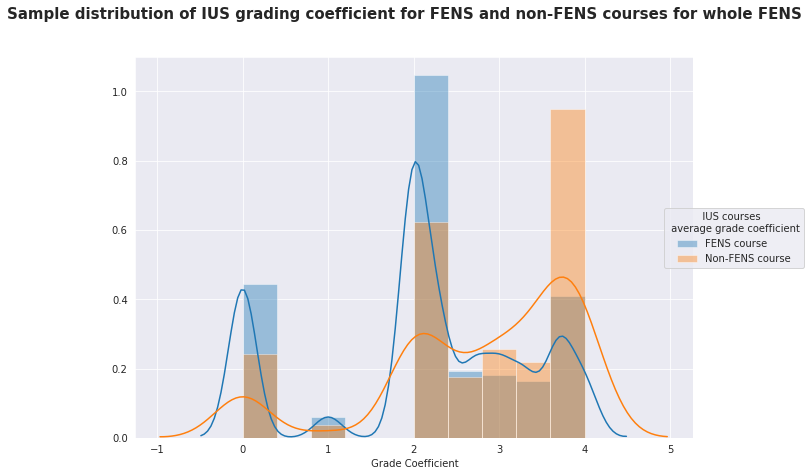

In [67]:
fig = plt.figure(figsize=(10,7))
sns.distplot(grades[' Grade Coefficient'][grades['FENS Course'] =='FENS course'], bins=10)
sns.distplot(grades[' Grade Coefficient'][grades['FENS Course'] !='FENS course'],bins=10)
legend = fig.legend(labels = grades['FENS Course'].unique()[:-1],loc='center right', 
           title = '           IUS courses \n average grade coefficient')
fig.suptitle('Sample distribution of IUS grading coefficient for FENS and non-FENS '+
          'courses for whole FENS', fontsize = 15, fontweight = 'bold')

Text(0.5, 0.98, 'Quantile-quantile plots for the sample distribution of grade coefficients\n for FENS and Non-FENS courses')

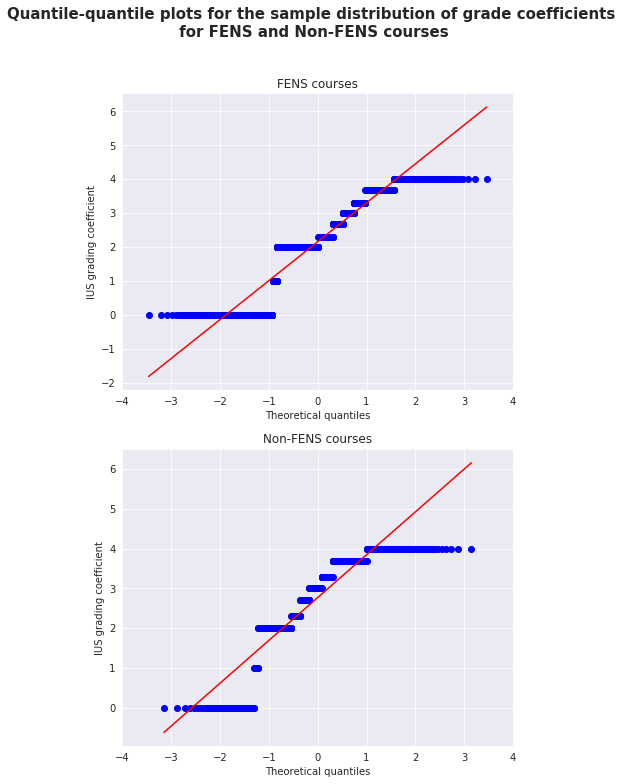

In [14]:
fig = plt.figure(figsize=(7,12))
axis = fig.add_subplot(211)
stats.probplot(grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] =='FENS course'], 
                   dist='norm', plot=plt)
axis.set_title('FENS courses')
axis.set_ylabel('IUS grading coefficient')
axis.set_xlim(-4,4)
axis = fig.add_subplot(212)
stats.probplot(grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] !='FENS course'], 
                   dist='norm', plot=plt)   
axis.set_xlim(-4,4)
axis.set_title('Non-FENS courses')
axis.set_ylabel('IUS grading coefficient')
fig.suptitle('Quantile-quantile plots for the sample distribution of grade coefficients\n for FENS and Non-FENS courses', fontsize = 15, fontweight = 'bold')

<br>Checking if the grade difference between FENS and non-FENS student is statistical significant

In [22]:
from scipy.stats import ttest_ind, mannwhitneyu

In [74]:
mannwhitneyu(grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] =='FENS course']
                          , grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] !='FENS course'])


MannwhitneyuResult(statistic=754872.0, pvalue=2.692286244858802e-43)

In [76]:
754872/(np.sqrt(3442))

12866.720993242789

In [23]:
u, p_value = mannwhitneyu(grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] =='FENS course']
                          , grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] !='FENS course'])
print(f"p value for wilcoxon = {p_value}and u value {u}")
t_statistic, p_value = ttest_ind(grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] =='FENS course']
                          , grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] !='FENS course'])
print(f"p value for t-test = {p_value} and t value = {t_statistic}")
      

p value for wilcoxon = 2.692286244858802e-43and u value 754872.0
p value for t-test = 4.828402401821517e-36 and t value = -12.6799835114507


In [72]:
u, p_value = mannwhitneyu(grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] =='FENS course']
                          , grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] !='FENS course'])
print(f"p value for wilcoxon = {p_value}and u value {u}")
t_statistic, p_value = ttest_ind(grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] =='FENS course']
                          , grades_for_coeff[' Grade Coefficient'][grades_for_coeff['FENS Course'] !='FENS course'])
print(f"p value for t-test = {p_value} and t value = {t_statistic}")
      

p value for wilcoxon = 2.692286244858802e-43and u value 754872.0
p value for t-test = 4.828402401821517e-36 and t value = -12.6799835114507


In [9]:
prog_courses = pd.crosstab(grades['Program'], grades['Program Course'])

In [78]:
fens_courses_cross = pd.crosstab(grades['Program'], grades['FENS Course'])

/home/fuad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


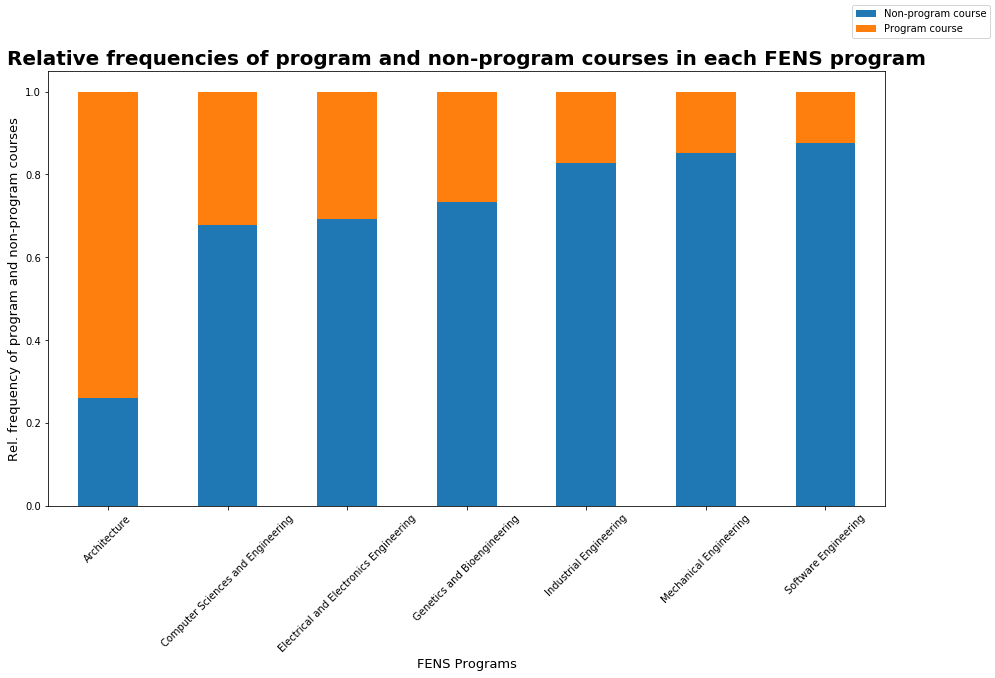

In [18]:
ax = plt.figure(figsize=(15,8))
stck_plt = prog_courses_1.plot.bar(stacked=True, ax=ax.gca(), legend=False)
stck_plt.set_ylabel('Rel. frequency of program and non-program courses', fontsize=13)
stck_plt.set_xlabel('FENS Programs', fontsize=13)
locs, labels = plt.xticks()
plt.xticks(locs, ['Architecture',
       'Computer Sciences and Engineering',
       'Electrical and Electronics Engineering',
       'Genetics and Bioengineering',
       'Industrial Engineering',
       'Mechanical Engineering', 'Software Engineering'],rotation=45)
ax.legend()
stck_plt.set_title('Relative frequencies of program and non-program courses in each FENS program', fontsize = 20, fontweight = 'bold')
ax.show()

/home/fuad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


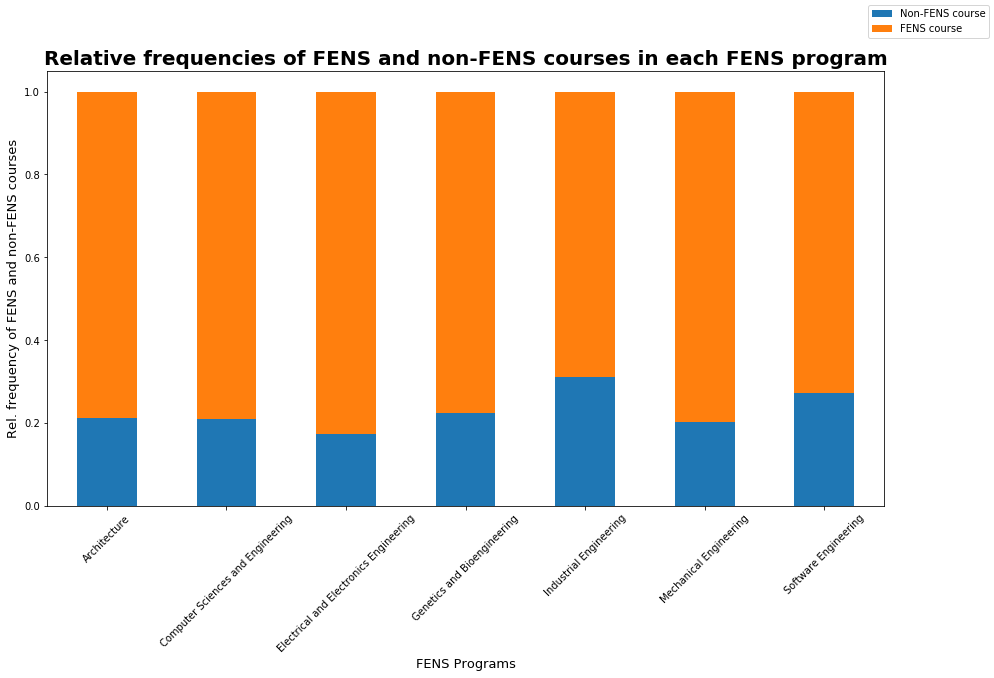

In [62]:
ax = plt.figure(figsize=(15,8))
stck_plt = fens_courses_cross_1.plot.bar(stacked=True, ax=ax.gca(), legend=False)
stck_plt.set_ylabel('Rel. frequency of FENS and non-FENS courses', fontsize=13)
stck_plt.set_xlabel('FENS Programs', fontsize=13)
locs, labels = plt.xticks()
plt.xticks(locs, ['Architecture',
       'Computer Sciences and Engineering',
       'Electrical and Electronics Engineering',
       'Genetics and Bioengineering',
       'Industrial Engineering',
       'Mechanical Engineering', 'Software Engineering'],rotation=45)
ax.legend()
stck_plt.set_title('Relative frequencies of FENS and non-FENS courses in each FENS program', fontsize = 20, fontweight = 'bold')
ax.show()

In [12]:
prog_courses['Total Courses'] = prog_courses['Non-program course'] + prog_courses['Program course']

In [56]:
fens_courses_cross['Total Courses'] = fens_courses_cross['Non-FENS course'] + fens_courses_cross['FENS course']

In [14]:
prog_courses_1 = pd.DataFrame()

In [57]:
fens_courses_cross_1 = pd.DataFrame()

In [15]:
prog_courses_1['Non-program course'] = prog_courses['Non-program course']/prog_courses['Total Courses']

In [59]:
fens_courses_cross_1['Non-FENS course'] = fens_courses_cross['Non-FENS course']/fens_courses_cross['Total Courses']

In [16]:
prog_courses_1['Program course'] = prog_courses['Program course']/prog_courses['Total Courses']

In [60]:
fens_courses_cross_1['FENS course'] = fens_courses_cross['FENS course']/fens_courses_cross['Total Courses']

In [32]:
prog_courses

Program Course,Non-program course,Program course
Program,,
Architecture (Bachelor),263,749
Computer Sciences and Engineering (Bachelor),903,429
Electrical and Electronics Engineering (Bachelor),305,136
Genetics and Bioengineering (Bachelor),375,137
Industrial Engineering (Bachelor),179,37
Mechanical Engineering (Bachelor),282,49
Software Engineering (Bachelor),564,80


In [61]:
fens_courses_cross_1

,Non-FENS course,FENS course
Program,,
Architecture (Bachelor),0.212451,0.787549
Computer Sciences and Engineering (Bachelor),0.210210,0.789790
Electrical and Electronics Engineering (Bachelor),0.174603,0.825397
Genetics and Bioengineering (Bachelor),0.224609,0.775391
Industrial Engineering (Bachelor),0.310185,0.689815
Mechanical Engineering (Bachelor),0.202417,0.797583
Software Engineering (Bachelor),0.271739,0.728261


In [21]:
prog_courses.drop(labels=['Total Courses'], axis=1, inplace=True)

In [39]:
prog_courses_chi = prog_courses.drop(labels=['Industrial Engineering (Bachelor)', 'Software Engineering (Bachelor)'])

In [40]:
prog_courses_chi

Program Course,Non-program course,Program course
Program,,
Architecture (Bachelor),263,749
Computer Sciences and Engineering (Bachelor),903,429
Electrical and Electronics Engineering (Bachelor),305,136
Genetics and Bioengineering (Bachelor),375,137
Mechanical Engineering (Bachelor),282,49


#### TESTING ASSOCIATION BETWEN PROGRAMS AND PROGRAMS COURSES

In [23]:
from scipy import stats

In [41]:
chi_square_val, pi_val, deg_freedom, expected_val  = stats.chi2_contingency(prog_courses_chi)

In [42]:
nl = '\n'
print(f"Chi2 value= {chi_square_val}{nl}p-value= {pi_val}{nl}Degrees of freedom= {deg_freedom}{nl}")

Chi2 value= 652.3229267249442
p-value= 7.322146168927164e-140
Degrees of freedom= 4



In [43]:
alph_val = 0.05/10
print(f'Alpha value: {alph_val}')

Alpha value: 0.005


In [46]:
dummies = pd.get_dummies(grades['Program'])
dummies.drop(labels=['Industrial Engineering (Bachelor)', 'Software Engineering (Bachelor)'], axis=1, inplace = True)
dummies

,Architecture (Bachelor),Computer Sciences and Engineering (Bachelor),Electrical and Electronics Engineering (Bachelor),Genetics and Bioengineering (Bachelor),Mechanical Engineering (Bachelor)
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
4490,0,0,0,0,0
4491,0,0,0,0,0
4492,0,0,0,0,0
4493,0,0,0,0,0


In [47]:
for series in dummies:
    crosstab = pd.crosstab(dummies[f"{series}"], grades['Program Course'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

Program Course           Non-program course  Program course
Architecture (Bachelor)                                    
0                                      2608             868
1                                       263             749 

Chi2 value= 815.7392292322875
p-value= 2.0422582148841056e-179
Degrees of freedom= 1

Program Course                                Non-program course  \
Computer Sciences and Engineering (Bachelor)                       
0                                                           1968   
1                                                            903   

Program Course                                Program course  
Computer Sciences and Engineering (Bachelor)                  
0                                                       1188  
1                                                        429   

Chi2 value= 11.771665533451682
p-value= 0.0006013914430364556
Degrees of freedom= 1

Program Course                                     Non-progr

#### TESTING ASSOCIATION BETWEN PROGRAMS AND FENS & NON-FENS COURSES

In [79]:
fens_courses_cross

FENS Course,FENS course,Non-FENS course
Program,,
Architecture (Bachelor),797,215
Computer Sciences and Engineering (Bachelor),1052,280
Electrical and Electronics Engineering (Bachelor),364,77
Genetics and Bioengineering (Bachelor),397,115
Industrial Engineering (Bachelor),149,67
Mechanical Engineering (Bachelor),264,67
Software Engineering (Bachelor),469,175


In [64]:
fens_courses_cross

FENS Course,FENS course,Non-FENS course
Program,,
Architecture (Bachelor),797,215
Computer Sciences and Engineering (Bachelor),1052,280
Electrical and Electronics Engineering (Bachelor),364,77
Genetics and Bioengineering (Bachelor),397,115
Industrial Engineering (Bachelor),149,67
Mechanical Engineering (Bachelor),264,67
Software Engineering (Bachelor),469,175


In [80]:
fens_courses_cross_chi = fens_courses_cross.drop(labels=['Industrial Engineering (Bachelor)'])
fens_courses_cross_chi

FENS Course,FENS course,Non-FENS course
Program,,
Architecture (Bachelor),797,215
Computer Sciences and Engineering (Bachelor),1052,280
Electrical and Electronics Engineering (Bachelor),364,77
Genetics and Bioengineering (Bachelor),397,115
Mechanical Engineering (Bachelor),264,67
Software Engineering (Bachelor),469,175


In [82]:
chi_square_val, pi_val, deg_freedom, expected_val  = stats.chi2_contingency(fens_courses_cross_chi, correction=True)
nl = '\n'
print(f"Chi2 value= {chi_square_val}{nl}p-value= {pi_val}{nl}Degrees of freedom= {deg_freedom}{nl}")
alph_val = 0.05/12
print(f'Alpha value: {alph_val}')
expected_val

Chi2 value= 17.06405425698208
p-value= 0.004379904804092509
Degrees of freedom= 5

Alpha value: 0.004166666666666667


array([[ 791.92790262,  220.07209738],
       [1042.33988764,  289.66011236],
       [ 345.09901685,   95.90098315],
       [ 400.65917603,  111.34082397],
       [ 259.019897  ,   71.980103  ],
       [ 503.95411985,  140.04588015]])

In [84]:
from itertools import combinations


In [88]:
all_combinations = list(combinations(fens_courses_cross_chi.index, 2))
print("Significance results:")
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = fens_courses_cross_chi[(fens_courses_cross_chi.index == comb[0]) | (fens_courses_cross_chi.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=False)
    print(f"Chi2 result for pair {comb}: {chi2}, p-value: {p}")

Significance results:
Chi2 result for pair ('Architecture (Bachelor)', 'Computer Sciences and Engineering (Bachelor)'): 0.017327848644993937, p-value: 0.8952727738036826
Chi2 result for pair ('Architecture (Bachelor)', 'Electrical and Electronics Engineering (Bachelor)'): 2.7399470178736, p-value: 0.0978680116189359
Chi2 result for pair ('Architecture (Bachelor)', 'Genetics and Bioengineering (Bachelor)'): 0.29627658199820517, p-value: 0.5862261404899549
Chi2 result for pair ('Architecture (Bachelor)', 'Mechanical Engineering (Bachelor)'): 0.1513700795305066, p-value: 0.6972294845963258
Chi2 result for pair ('Architecture (Bachelor)', 'Software Engineering (Bachelor)'): 7.683690716866078, p-value: 0.005572209146319601
Chi2 result for pair ('Computer Sciences and Engineering (Bachelor)', 'Electrical and Electronics Engineering (Bachelor)'): 2.612111541822411, p-value: 0.10605047019940177
Chi2 result for pair ('Computer Sciences and Engineering (Bachelor)', 'Genetics and Bioengineering (

In [75]:
dummies = pd.get_dummies(grades['Program'])
dummies.drop(labels=['Industrial Engineering (Bachelor)'], axis=1, inplace = True)
dummies

,Architecture (Bachelor),Computer Sciences and Engineering (Bachelor),Electrical and Electronics Engineering (Bachelor),Genetics and Bioengineering (Bachelor),Mechanical Engineering (Bachelor),Software Engineering (Bachelor)
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
4490,0,0,0,0,0,1
4491,0,0,0,0,0,1
4492,0,0,0,0,0,1
4493,0,0,0,0,0,1


In [76]:
for series in dummies:
    crosstab = pd.crosstab(dummies[f"{series}"], grades['FENS Course'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

FENS Course              FENS course  Non-FENS course
Architecture (Bachelor)                              
0                               2695              781
1                                797              215 

Chi2 value= 0.6102725217547177
p-value= 0.43468521934071225
Degrees of freedom= 1

FENS Course                                   FENS course  Non-FENS course
Computer Sciences and Engineering (Bachelor)                              
0                                                    2440              716
1                                                    1052              280 

Chi2 value= 1.4105344481579525
p-value= 0.23496769207667595
Degrees of freedom= 1

FENS Course                                        FENS course  \
Electrical and Electronics Engineering (Bachelor)                
0                                                         3128   
1                                                          364   

FENS Course                                      